In [ ]:
import pandas as pd

In [ ]:
chipo = pd.read_csv("chipotle.tsv.txt", sep="\t")

In [ ]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
chipo.shape

(4622, 5)

In [ ]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [ ]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [ ]:
chipo["order_id"] = chipo["order_id"].astype(str)

In [ ]:
chipo["order_id"].unique()

array(['1', '2', '3', ..., '1832', '1833', '1834'], dtype=object)

In [ ]:
len(chipo["order_id"].unique())

1834

In [ ]:
chipo["item_name"].value_counts()[:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [ ]:
chipo.groupby("item_name")["order_id"].count()

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [ ]:
chipo.groupby("item_name")["quantity"].sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


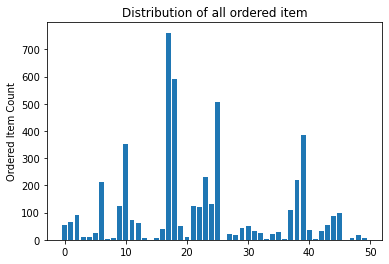

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
item_quantity = chipo.groupby("item_name")["quantity"].sum()
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align="center")
plt.ylabel("Ordered Item Count")
plt.title("Distribution of all ordered item")
plt.show()

In [ ]:
chipo["item_price"] = chipo["item_price"].apply(
    lambda x: float(x[1:])
)

In [ ]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [ ]:
chipo.groupby("order_id")["item_price"].sum()

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [ ]:
chipo.groupby("order_id")["item_price"].sum().mean()

18.811428571428568

In [ ]:
chipo.groupby("order_id").sum()

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [ ]:
chipo_order_id_group = chipo.groupby("order_id").sum()
chipo_order_id_group[chipo_order_id_group["item_price"] >= 10]

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [ ]:
chipo_singular = chipo[chipo["quantity"]==1]
chipo_singular

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [ ]:
price_per_item = chipo_singular.groupby("item_name").min()
price_per_item

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,1009,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40


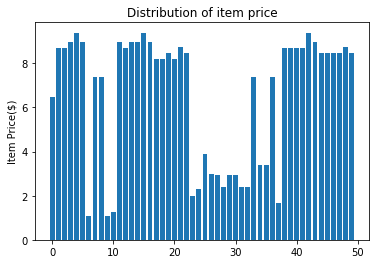

In [ ]:
%matplotlib inline
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item["item_price"].tolist()

plt.bar(x_pos, item_price, align = "center")
plt.ylabel("Item Price($)")
plt.title("Distribution of item price")
plt.show()